## Breast Cancer Classification ### 

Best k value: 10 Best accuracy is: 0.956140350877193
Best k value: 26 Best accuracy is: 0.9912280701754386
Best k value: 28 Best accuracy is: 0.9736842105263158


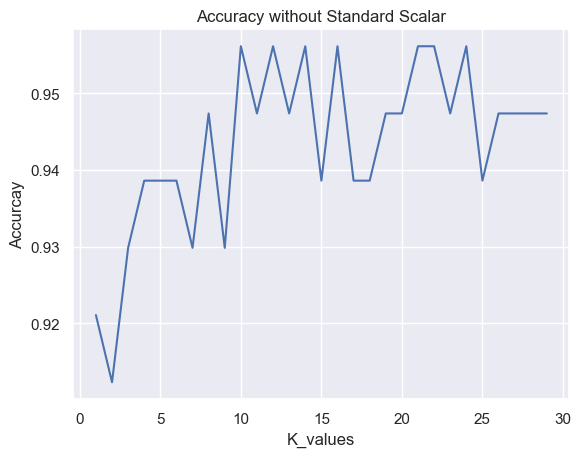

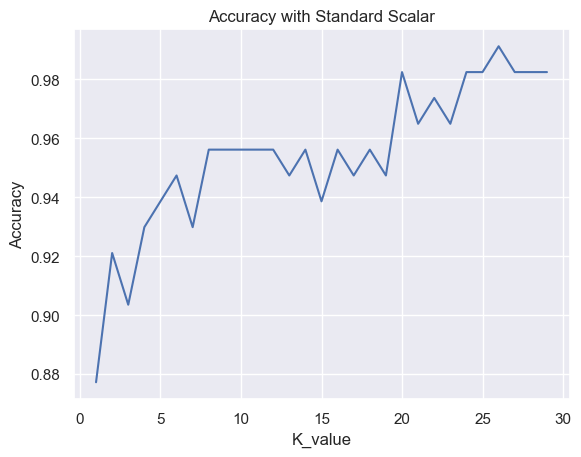

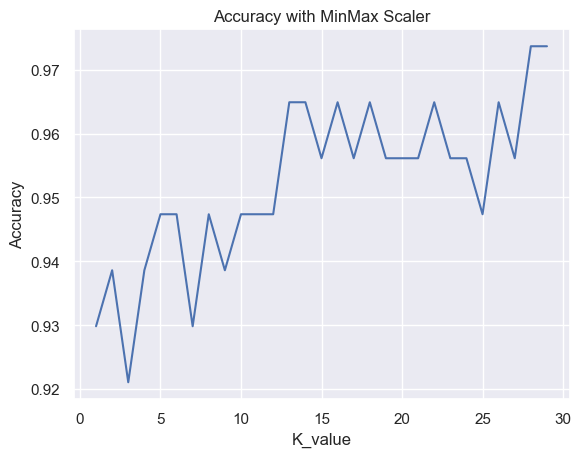

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import openpyxl
from openpyxl import Workbook
from openpyxl.drawing.image import Image
import plotly.io as pio
import xlsxwriter
%matplotlib inline
sns.set()


##First function- without standardising the inputs and note that we only disregard the id and unnamed:32 columns for 
## all scenario

def without_Standardisation(x_train,x_test,y_train,y_test):
    
    accuracies=[]
    
    k_values=list(range(1,30))
    for k in k_values:
        ## using KNeighborsClassifier function to iterate 
        ## upto the k values ie 30. 
        knn=KNeighborsClassifier(n_neighbors=k)
        KNN=knn.fit(x_train,y_train)
        #print(KNN.score(x_train,y_train))
        Ypred=KNN.predict(x_test)
        
        accuracy=accuracy_score(y_test,Ypred)
        ## appending the accuracy for later use 
        accuracies.append(accuracy)
    result_df1=pd.DataFrame({'k':k_values,'Accuracy':accuracies})
   ## plotting the figure
    plt.figure()
    plt.plot(result_df1['k'],result_df1['Accuracy'])
    plt.xlabel('K_values')
    plt.ylabel('Accurcay')
    plt.title('Accuracy without Standard Scalar')
    #plt.show()
    plt.savefig('KNN1.png')
    best_k1=k_values[accuracies.index(max(accuracies))]
    best_accuracy1=max(accuracies)

    print('Best k value:',best_k1,'Best accuracy is:',best_accuracy1)
    return result_df1
## function-for standardisation 
def with_standardisation(x_train,x_test,y_train,y_test):
    ## using simple Standardisation in which we are normalizing the inputs 
    ## Mean=0 and SD=1
    scaler=StandardScaler()
    
    ## fitting it and then transforming the values
    
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.fit_transform(x_test)
   
    accuracies=[]
    k_values=list(range(1,30))
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k)
        KNN=knn.fit(x_train_scaled,y_train)
        #print(KNN.score(x_train,y_train))
        Ypred=KNN.predict(x_test_scaled)
        accuracy=accuracy_score(y_test,Ypred)
        accuracies.append(accuracy)
    result_df2=pd.DataFrame({'k':k_values,'Accuracy':accuracies})


    plt.figure()
    plt.plot(result_df2['k'],result_df2['Accuracy'])
    plt.xlabel('K_value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy with Standard Scalar')
    #plt.show()
    plt.savefig('KNN2.png')

    best_k2=k_values[accuracies.index(max(accuracies))]
    best_accuracy2=max(accuracies)

    print('Best k value:',best_k2,'Best accuracy is:',best_accuracy2)
    return result_df2

## function for MinMax Standardization

def with_MinMax(x_train,x_test,y_train,y_test):
    
    scaler=MinMaxScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.fit_transform(x_test)
    accuracies=[]
    k_values=list(range(1,30))
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k)
        KNN=knn.fit(x_train_scaled,y_train)
        Ypred=KNN.predict(x_test_scaled)
        accuracy=accuracy_score(y_test,Ypred)
        accuracies.append(accuracy)
    result_df3=pd.DataFrame({'k':k_values,'Accuracy':accuracies})
    
    plt.figure()
    plt.plot(result_df3['k'],result_df3['Accuracy'])
    plt.xlabel('K_value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy with MinMax Scaler')
    #plt.show()
    plt.savefig('KNN3.png')

    best_k3=k_values[accuracies.index(max(accuracies))]
    best_accuracy3=max(accuracies)
    print('Best k value:',best_k3,'Best accuracy is:',best_accuracy3)
    return result_df3

def main():
    
    ## reading the dataset which have been downloaded from Kaggle
    
    df=pd.read_csv('data.csv')
    ## Dropping the id and unnamed:32 as it is of no use
    df.drop(['id'],axis=1,inplace=True)
    df.drop(['Unnamed: 32'],axis=1,inplace=True)
            
    ## Converting M-Melign into 1 and Begning into 0 and using these as targets
    
    df['diagnosis'].replace({'M':1,'B':0},inplace=True)
    
    x=df.drop(['diagnosis'],axis=1)
    y=df['diagnosis']
    
    ## splitting the datasets into 80:20 splits
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)
    
    ## calling those functions
    result_df1=without_Standardisation(x_train,x_test,y_train,y_test)
    result_df2=with_standardisation(x_train,x_test,y_train,y_test)
    result_df3=with_MinMax(x_train,x_test,y_train,y_test)
    
    ## Storing all the values in the named xlsx file
    writer=pd.ExcelWriter('Classification_result.xlsx',engine='openpyxl')
    
    
    result_df1.to_excel(writer,sheet_name='KNN without Standardisation',index=False)
    result_df2.to_excel(writer,sheet_name='KNN with Standardisation', index=False)
    result_df3.to_excel(writer,sheet_name="KNN with MinMax Standardisation",index=False)
    
    
    
 
    writer.save()
    writer.close()
   
    ### add the images alongside the results for better understanding
    
    workbook=openpyxl.load_workbook('Classification_result.xlsx')
    sheet1=workbook['KNN without Standardisation']
    sheet2=workbook['KNN with Standardisation']
    sheet3=workbook['KNN with MinMax Standardisation']
    
    img=Image('KNN1.png')
    sheet1.add_image(img,'E1')
    img1=Image('KNN2.png')
    sheet2.add_image(img1,'E1')
    img2=Image('KNN3.png')
    sheet3.add_image(img2,'E1')
    
    workbook.save('Classification_result.xlsx')
    
     
    
    
    
    


if __name__=='__main__':
    main()
    
    